In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import tigramite
import tigramite.data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.parcorr import ParCorr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats



df = pd.read_csv("dataset/time_series_sa_dt.csv")
df1 = pd.read_csv("dataset/daily_time_series_sa_dt_aug_18.csv")
df1["Pro.Reg.Tweets.Daily"].tolist()
df1["Anti.Reg.Tweets.Daily"].tolist()
columns = [
    'Date', 'Media Crime', 'Media Shootings',
    'Media Regulations', 'Background checks',
    'Pro Regulation Tweets',
    'Anti Regulation Tweets']
df.columns = columns

# Convert the Date column in df to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Convert the Unnamed: 0 column in df1 to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Merge the two DataFrames on the Date columns
merged_df = pd.merge(df, df1, left_on='Date', right_on='Date')


# Display the first few rows of the merged DataFrame
merged_df.head()

/tmp/ipykernel_2549944/805775742.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


,Date,Media Crime,Media Shootings,Media Regulations,Background checks,Pro Regulation Tweets,Anti Regulation Tweets,Pro.Reg.Tweets.Daily,Anti.Reg.Tweets.Daily
0,2012-01-01,-0.230362,-2.352898,0.064819,-20880.433230,10.045590,4.900605,-40.636442,-16.663162
1,2012-01-02,-3.468350,-2.691753,-0.596121,-6392.895386,33.806599,-3.178643,-29.024289,-7.684396
2,2012-01-03,0.293055,0.178049,0.495053,4534.480732,-7.534003,-4.040757,-7.412135,7.294370
3,2012-01-04,-3.362858,3.579763,0.577984,10822.713840,14.688275,-0.238617,-15.799981,-4.726865
4,2012-01-05,3.766456,-1.344011,0.023943,12877.514620,-15.971186,2.342391,2.812173,8.251901


In [2]:
var_names = [
    'Media Crime',
    'Media Shootings',
    'Media Regulations',
    'Background checks',
    "Pro.Reg.Tweets.Daily",
    "Anti.Reg.Tweets.Daily"
]

# Convert all relevant columns to numeric values
merged_df[var_names] = merged_df[var_names].apply(pd.to_numeric, errors='coerce')

dataframe = pp.DataFrame(
    merged_df[var_names].to_numpy(), 
    datatime = np.arange(merged_df.shape[0]),  
    var_names=var_names)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

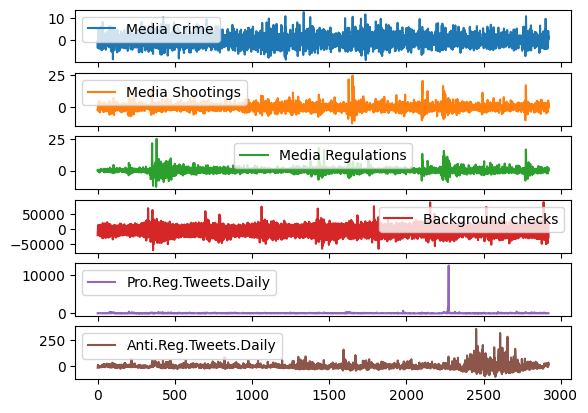

In [3]:
merged_df[var_names].plot(subplots=True)

# PCMCI+ for 7 days with partial correlation.

In [4]:
pcmci=PCMCI( 
    dataframe=dataframe, 
    cond_ind_test=ParCorr(),
    verbosity=1)

In [5]:
pcmci_plus_results = pcmci.run_pcmciplus(tau_max=7, pc_alpha=0.01, max_conds_dim=None, max_conds_px=None)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 7
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable Media Crime has 9 link(s):
        (Media Crime -6): max_pval = 0.00000, |min_val| =  0.246
        (Media Crime -3): max_pval = 0.00000, |min_val| =  0.241
        (Background checks -1): max_pval = 0.00000, |min_val| =  0.189
        (Media Crime -4): max_pval = 0.00000, |min_val| =  0.184
        (Background checks -3): max_pval = 0.00000, |min_val| =  0.129
        (Media Crime -5): max_pval = 0.00000, |min_val| =  0.088
        (Media Shootings -1): max_pval = 0.00000, |min_val| =  0.086
        (Media Crime -7): max_pval = 0.00537, |min_val| =  0.052
        (Anti.Reg.Tweets.Daily -2): max_pval = 0.00648, |min_val| =  0.051

    Variable Media Shootings has 7 link(s):
        (Media Shootings -3): max_pval = 0.00000, |min_val| =  0.231
 

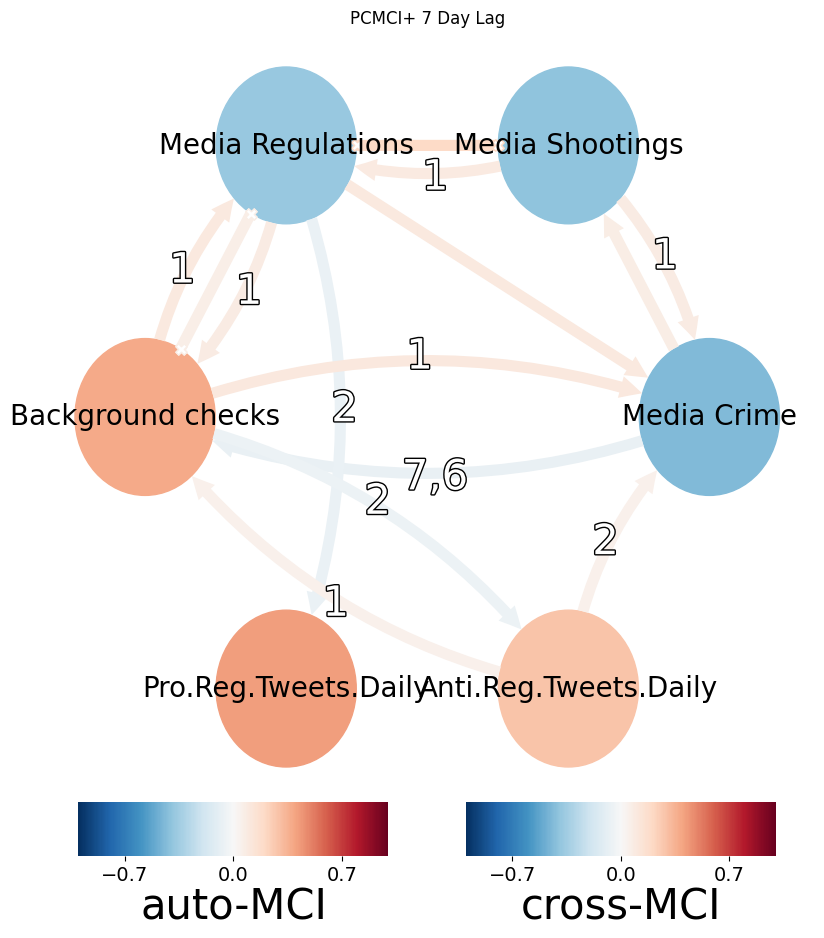

In [6]:
tp.plot_graph(
    val_matrix=pcmci_plus_results['val_matrix'],
    graph=pcmci_plus_results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    figsize=(10,10),
    link_label_fontsize=30,
    label_fontsize=30,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.7,
    node_ticks=0.7,
    node_size=0.5,
    arrowhead_size=1000
    )
plt.title("PCMCI+ 7 Day Lag")
plt.show()

In [7]:
pcmci.print_significant_links(
    p_matrix = pcmci_plus_results['p_matrix'],
    val_matrix = pcmci_plus_results['val_matrix'],
    alpha_level = 0.01)



## Significant links at alpha = 0.01:

    Variable Media Crime has 9 link(s):
        (Media Crime -6): pval = 0.00000 | val = -0.445
        (Media Crime -3): pval = 0.00000 | val = -0.371
        (Media Crime -4): pval = 0.00000 | val = -0.178
        (Background checks -1): pval = 0.00000 | val =  0.105
        (Media Regulations  0): pval = 0.00000 | val =  0.100
        (Media Shootings -1): pval = 0.00001 | val =  0.083
        (Media Shootings  0): pval = 0.00013 | val =  0.071
        (Media Crime -7): pval = 0.00067 | val =  0.063
        (Anti.Reg.Tweets.Daily -2): pval = 0.00996 | val =  0.048

    Variable Media Shootings has 6 link(s):
        (Media Shootings -6): pval = 0.00000 | val = -0.405
        (Media Shootings -3): pval = 0.00000 | val = -0.302
        (Media Shootings -1): pval = 0.00000 | val =  0.232
        (Media Regulations  0): pval = 0.00000 | val =  0.199
        (Media Shootings -4): pval = 0.00000 | val = -0.094
        (Media Crime  0): pval = 0.0001

In [12]:
import difflib

a = """
## Significant links at alpha = 0.01:

    Variable Media Crime has 8 link(s):
        (Media Crime -6): pval = 0.00000 | val = -0.445
        (Media Crime -3): pval = 0.00000 | val = -0.371
        (Media Crime -4): pval = 0.00000 | val = -0.178
        (Background checks -1): pval = 0.00000 | val =  0.105
        (Media Regulations  0): pval = 0.00000 | val =  0.100
        (Media Shootings -1): pval = 0.00001 | val =  0.083
        (Media Crime -7): pval = 0.00067 | val =  0.063
        (Anti.Reg.Tweets.Daily -2): pval = 0.00996 | val =  0.048

    Variable Media Shootings has 6 link(s):
        (Media Shootings -6): pval = 0.00000 | val = -0.405
        (Media Shootings -3): pval = 0.00000 | val = -0.302
        (Media Shootings -1): pval = 0.00000 | val =  0.232
        (Media Regulations  0): pval = 0.00000 | val =  0.199 | unclear orientation due to conflict
        (Media Shootings -4): pval = 0.00000 | val = -0.094
        (Media Crime  0): pval = 0.00013 | val =  0.071

    Variable Media Regulations has 8 link(s):
        (Media Regulations -6): pval = 0.00000 | val = -0.382
        (Media Regulations -3): pval = 0.00000 | val = -0.295
        (Media Regulations -1): pval = 0.00000 | val =  0.264
        (Media Shootings  0): pval = 0.00000 | val =  0.199 | unclear orientation due to conflict
        (Media Regulations -7): pval = 0.00000 | val =  0.196
        (Background checks -1): pval = 0.00000 | val =  0.099
        (Media Shootings -1): pval = 0.00000 | val =  0.094
        (Background checks  0): pval = 0.00016 | val =  0.070 | unclear orientation due to conflict

    Variable Background checks has 8 link(s):
        (Background checks -7): pval = 0.00000 | val =  0.382
        (Background checks -3): pval = 0.00000 | val = -0.267
        (Media Regulations -1): pval = 0.00001 | val =  0.084
        (Media Crime -7): pval = 0.00005 | val = -0.075
        (Media Regulations  0): pval = 0.00016 | val =  0.070 | unclear orientation due to conflict
        (Background checks -5): pval = 0.00042 | val = -0.066
        (Media Crime -6): pval = 0.00346 | val =  0.054
        (Anti.Reg.Tweets.Daily -1): pval = 0.00915 | val =  0.048

    Variable Pro.Reg.Tweets.Daily has 4 link(s):
        (Pro.Reg.Tweets.Daily -1): pval = 0.00000 | val =  0.422
        (Pro.Reg.Tweets.Daily -2): pval = 0.00000 | val = -0.124
        (Pro.Reg.Tweets.Daily -3): pval = 0.00000 | val =  0.116
        (Media Regulations -2): pval = 0.00019 | val = -0.069

    Variable Anti.Reg.Tweets.Daily has 3 link(s):
        (Anti.Reg.Tweets.Daily -1): pval = 0.00000 | val =  0.289
        (Anti.Reg.Tweets.Daily -7): pval = 0.00001 | val =  0.082
        (Background checks -2): pval = 0.00137 | val = -0.059
        
    """

b = """
## Significant links at alpha = 0.01:

    Variable Media Crime has 9 link(s):

        (Media Shootings  0): pval = 0.00013 | val =  0.071

        
    Variable Media Regulations has 9 link(s):
        (Media Regulations -6): pval = 0.00000 | val = -0.382
        (Media Regulations -3): pval = 0.00000 | val = -0.295
        (Media Regulations -1): pval = 0.00000 | val =  0.264
        (Media Shootings  0): pval = 0.00000 | val =  0.199
        (Media Regulations -7): pval = 0.00000 | val =  0.196
        (Media Crime  0): pval = 0.00000 | val =  0.100
        (Background checks -1): pval = 0.00000 | val =  0.099
        (Media Shootings -1): pval = 0.00000 | val =  0.094
        (Background checks  0): pval = 0.00016 | val =  0.070

    Variable Background checks has 8 link(s):
        (Background checks -7): pval = 0.00000 | val =  0.382
        (Background checks -3): pval = 0.00000 | val = -0.267
        (Media Regulations -1): pval = 0.00001 | val =  0.084
        (Media Crime -7): pval = 0.00005 | val = -0.075
        (Media Regulations  0): pval = 0.00016 | val =  0.070
        (Background checks -5): pval = 0.00042 | val = -0.066
        (Media Crime -6): pval = 0.00346 | val =  0.054
        (Anti.Reg.Tweets.Daily -1): pval = 0.00915 | val =  0.048

    Variable Pro.Reg.Tweets.Daily has 4 link(s):
        (Pro.Reg.Tweets.Daily -1): pval = 0.00000 | val =  0.422
        (Pro.Reg.Tweets.Daily -2): pval = 0.00000 | val = -0.124
        (Pro.Reg.Tweets.Daily -3): pval = 0.00000 | val =  0.116
        (Media Regulations -2): pval = 0.00019 | val = -0.069

    Variable Anti.Reg.Tweets.Daily has 3 link(s):
        (Anti.Reg.Tweets.Daily -1): pval = 0.00000 | val =  0.289
        (Anti.Reg.Tweets.Daily -7): pval = 0.00001 | val =  0.082
        (Background checks -2): pval = 0.00137 | val = -0.059
"""
# Split the strings into lists of lines
lines_a = [l.strip() for l in a.splitlines()]
lines_b = [l.strip() for l in a.splitlines()]

# Use difflib to compare the lines
diff = difflib.unified_diff(lines_a, lines_b, lineterm="\n")

# Print out the differences
for line in diff:
    print(line)

In [13]:
lines_a

['',
 '## Significant links at alpha = 0.01:',
 '',
 'Variable Media Crime has 8 link(s):',
 '(Media Crime -6): pval = 0.00000 | val = -0.445',
 '(Media Crime -3): pval = 0.00000 | val = -0.371',
 '(Media Crime -4): pval = 0.00000 | val = -0.178',
 '(Background checks -1): pval = 0.00000 | val =  0.105',
 '(Media Regulations  0): pval = 0.00000 | val =  0.100',
 '(Media Shootings -1): pval = 0.00001 | val =  0.083',
 '(Media Crime -7): pval = 0.00067 | val =  0.063',
 '(Anti.Reg.Tweets.Daily -2): pval = 0.00996 | val =  0.048',
 '',
 'Variable Media Shootings has 6 link(s):',
 '(Media Shootings -6): pval = 0.00000 | val = -0.405',
 '(Media Shootings -3): pval = 0.00000 | val = -0.302',
 '(Media Shootings -1): pval = 0.00000 | val =  0.232',
 '(Media Regulations  0): pval = 0.00000 | val =  0.199 | unclear orientation due to conflict',
 '(Media Shootings -4): pval = 0.00000 | val = -0.094',
 '(Media Crime  0): pval = 0.00013 | val =  0.071',
 '',
 'Variable Media Regulations has 8 link(